In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import torch
from torch import nn

In [ ]:
X, y = datasets.load_diabetes(return_X_y=True, scaled=False)
X = X[:,2] # for the purpose of comparison, the analysis was restricted to a singlcd e feature.

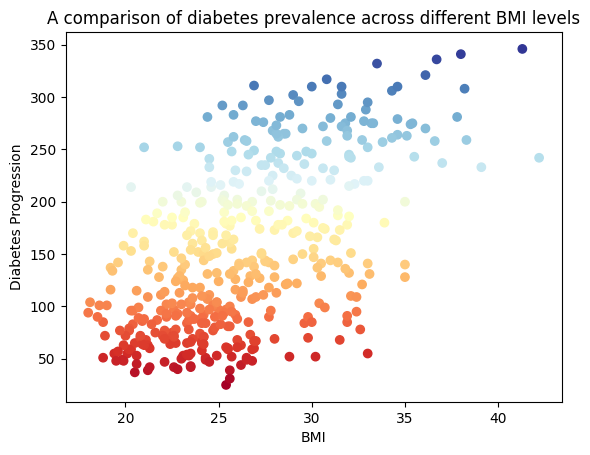

In [27]:
plt.scatter(x=X,y=y, c=y, cmap=plt.cm.RdYlBu)
plt.title("A comparison of diabetes prevalence across different BMI levels")
plt.xlabel("BMI")
plt.ylabel("Diabetes Progression")
plt.show()

In [5]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [7]:
len(X_train), len(X_test), len(y_train), len(y_test)

(353, 89, 353, 89)

In [8]:
def plot_predition(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels= y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data") 
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data") 
    plt.title("A comparison of diabetes prevalence across different BMI levels")
    plt.xlabel("BMI")
    plt.ylabel("Diabetes Progression")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", label="Predictions") 

    plt.legend(prop={"size": 14})
    plt.show()

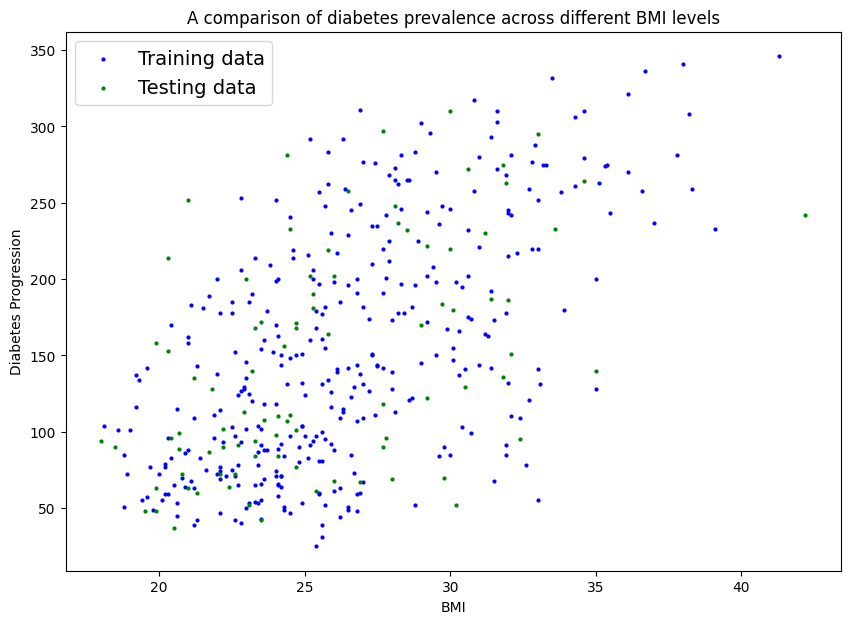

In [9]:
plot_predition(X_train, y_train, X_test, y_test)

A comparative analysis of two models implemented in PyTorch

In [10]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias
    

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [11]:
torch.manual_seed(20)
model_1 = LinearRegressionModel()
model_2 = LinearRegressionModelV2()

Choosing a Loss Function and Optimizer

In [12]:
loss_fn = nn.L1Loss()
loss_mse = nn.MSELoss()
optimizer_1 = torch.optim.SGD(params = model_1.parameters(),lr=0.001)
optimizer_2 = torch.optim.SGD(params = model_2.parameters(),lr=0.001)

Loop for first model and first optimizer!

In [13]:
torch.manual_seed(42)

epochs = 300 # After several iterations, this was determined to be the optimal value.

epoch_count_1 = []
loss_values_1 = []
test_loss_values_1 = []

for epoch in range(epochs):
    model_1.train()
    
    y_pred_1 = model_1(X_train)
    
    loss_1 = loss_fn(y_pred_1, y_train)
    
    optimizer_1.zero_grad()
    
    loss_1.backward()
    
    optimizer_1.step()

    model_1.eval()


    with torch.inference_mode():
        test_pred_1 = model_1(X_test).squeeze()
        test_loss_1 = loss_fn(test_pred_1, y_test)

    if epoch % 10 == 0:
        epoch_count_1.append(epoch)
        loss_values_1.append(loss_1)
        test_loss_values_1.append(test_loss_1)
        # print(f"Epoch: {epoch} | Test: {loss_1} | Test loss: {test_loss_1}")

Loop for second model and first optimizer

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
torch.manual_seed(42)

epochs = 300 # After several iterations, this was determined to be the optimal value.

epoch_count_2 = []
loss_values_2 = []
test_loss_values_2 = []

for epoch in range(epochs):
    model_2.train()
    
    y_pred_2 = model_2(X_train)
    
    loss_2 = loss_fn(y_pred_2, y_train)
    
    optimizer_2.zero_grad()
    
    loss_2.backward()
    
    optimizer_2.step()

    model_2.eval()


    with torch.inference_mode():
        test_pred_2 = model_2(X_test)
        test_loss_2 = loss_fn(test_pred_2, y_test)

    if epoch % 10 == 0:
        epoch_count_2.append(epoch)
        loss_values_2.append(loss_2)
        test_loss_values_2.append(test_loss_2)
        # print(f"Epoch: {epoch} | Test: {loss_2} | Test loss: {test_loss_2}")

Graph for first model!

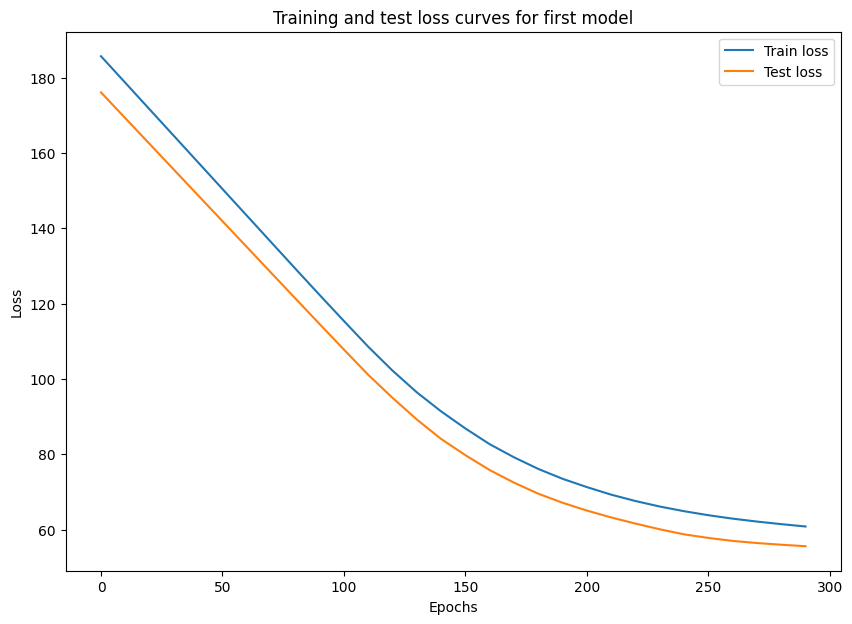

In [16]:
plt.figure(figsize=(10, 7))
plt.plot(epoch_count_1, np.array(torch.tensor(loss_values_1).numpy()), label="Train loss")
plt.plot(epoch_count_1, np.array(torch.tensor(test_loss_values_1).numpy()), label="Test loss")
plt.title("Training and test loss curves for first model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Graph for second model!

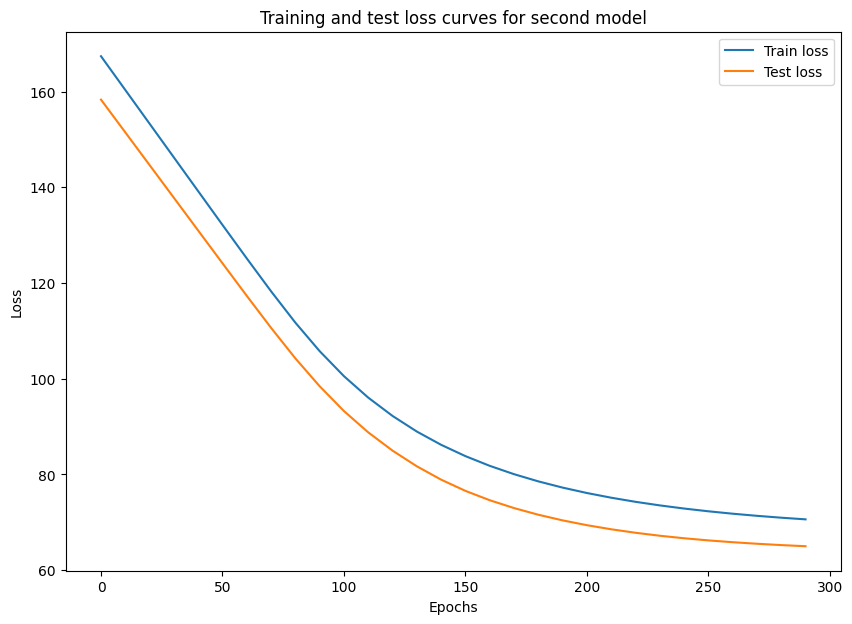

In [17]:
plt.figure(figsize=(10, 7))
plt.plot(epoch_count_2, np.array(torch.tensor(loss_values_2).numpy()), label="Train loss")
plt.plot(epoch_count_2, np.array(torch.tensor(test_loss_values_2).numpy()), label="Test loss")
plt.title("Training and test loss curves for second model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

After comparing the two implementations and observing their comparable performance, we will proceed with the second implementation to conduct experiments using all features and evaluate the resulting outcomes.


In [18]:
X_all, y_all = datasets.load_diabetes(return_X_y=True, scaled=False)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_all = scaler.fit_transform(X_all)

In [19]:
X_all = torch.from_numpy(X_all).type(torch.float32)
y_all = torch.from_numpy(y_all).type(torch.float32)

In [20]:
from sklearn.model_selection import train_test_split

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2,  random_state=42)

In [21]:
len(X_train_all), len(X_test_all), len(y_train_all), len(y_test_all)

(353, 89, 353, 89)

In [22]:
class LinearRegressionModelAll(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=10, out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [23]:
torch.manual_seed(42)
model_all = LinearRegressionModelAll()

In [24]:
loss_fn_all = nn.MSELoss()
optimizer_all = torch.optim.SGD(params = model_all.parameters(),lr=0.01)

In [ ]:
torch.manual_seed(42)

epochs = 100 # After several iterations, this was determined to be the optimal value.

epoch_count_all = []
loss_values_all = []
test_loss_values_all = []

for epoch in range(epochs):
    model_all.train()
    
    y_pred_all = model_all(X_train_all)
    
    loss_all = loss_fn_all(y_pred_all, y_train_all)
    
    optimizer_all.zero_grad()
    
    loss_all.backward()
    
    optimizer_all.step()

    model_all.eval()


    with torch.inference_mode():
        test_pred_all = model_all(X_test_all)
        test_loss_all = loss_fn_all(test_pred_all, y_test_all)

    if epoch % 10 == 0:
        epoch_count_all.append(epoch)
        loss_values_all.append(loss_all)
        test_loss_values_all.append(test_loss_all)
        print(f"Epoch: {epoch} | Test: {loss_all} | Test loss: {test_loss_all}")

Graph for model with all features!

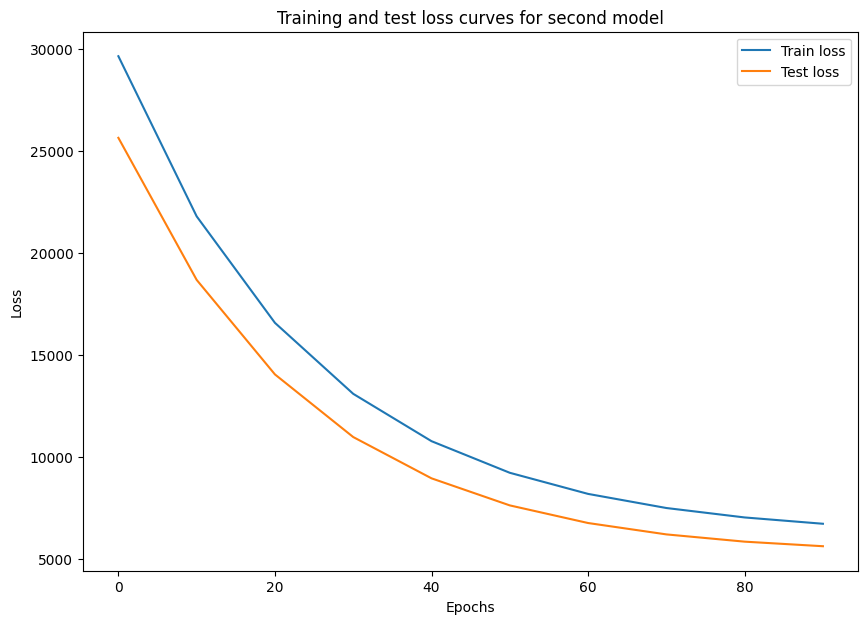

In [26]:
plt.figure(figsize=(10, 7))
plt.plot(epoch_count_all, np.array(torch.tensor(loss_values_all).numpy()), label="Train loss")
plt.plot(epoch_count_all, np.array(torch.tensor(test_loss_values_all).numpy()), label="Test loss")
plt.title("Training and test loss curves for second model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()